# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)


/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Hate Crime Data per Year

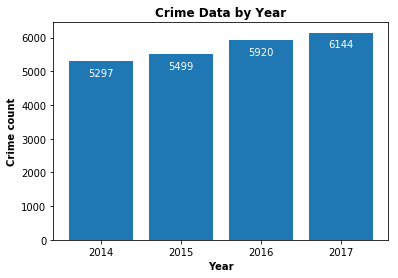

In [17]:
Crime_by_year_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.', 'Total Offender Count','Offender Race'])


Crime_by_year_df = Crime_by_year_df[Crime_by_year_df.Year >= 2014]
#Crime_by_year_df.head()


Crime_count_by_year_df = Crime_by_year_df.groupby([ "Year"])

ccount = Crime_count_by_year_df['Total Offender Count'].sum()
year = Crime_count_by_year_df['Year'].first()

ccnt_summary_df = pd.DataFrame({'Year' : year,
                              'Total Offender count' : ccount,
                              })

ccnt_summary_df.head()

bar_chart = plt.bar(ccnt_summary_df["Year"], ccnt_summary_df["Total Offender count"], alpha=1, align='center')


def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 500
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)


plt.title("Crime Data by Year", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Crime count", fontweight = "bold")
plt.xticks(np.arange(min(ccnt_summary_df["Year"]), max(ccnt_summary_df["Year"]+1), 1.0))

plt.show()

# Officer Count by State and Year

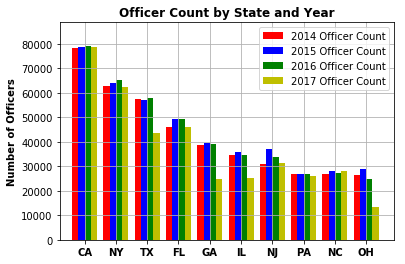

In [18]:
# Setting the positions and width for the bars
pos = np.arange(10)
width = 0.2

# Plotting the bars
fig, ax = plt.subplots()

# Create a bar with 2014 data,
# in position pos,
plt.bar(pos, police_count_2014_2017_df['2014 Officer Count'], width, alpha=1, color='r', 
        label=police_count_2014_2017_df['State Abbr.'])

# Create a bar with 2015 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], police_count_2014_2017_df['2015 Officer Count'], width, alpha=1, color='b', 
        label=police_count_2014_2017_df['State Abbr.'])


# Create a bar with 2016 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], police_count_2014_2017_df['2016 Officer Count'], width, alpha=1, color='g', 
        label=police_count_2014_2017_df['State Abbr.'])


# Create a bar with 2017 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], police_count_2014_2017_df['2017 Officer Count'], width, alpha=1, color='y',
        label=police_count_2014_2017_df['State Abbr.'])


# Set the y axis label
ax.set_ylabel('Number of Officers', fontweight = "bold")

# Set the chart's title
ax.set_title('Officer Count by State and Year', fontweight = "bold")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(police_count_2014_2017_df['State Abbr.'], fontweight = "bold")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos) - 0.5, 10 + width)
plt.ylim([0, max(police_count_2014_2017_df['2017 Officer Count']+10000)])


# Adding the legend and showing the plot
plt.legend(['2014 Officer Count', '2015 Officer Count', '2016 Officer Count', '2017 Officer Count'], loc='upper right')
plt.grid()
plt.show()

# Officers per Person Graph

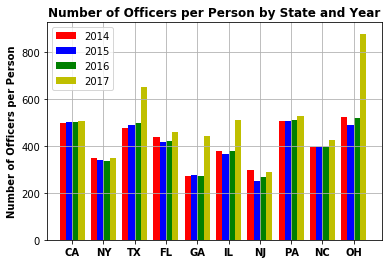

In [19]:
pos = np.arange(10)
width = 0.2

# Plotting the bars
fig, ax = plt.subplots()

# Create a bar with 2014 data,
# in position pos,
plt.bar(pos, police_count_2014_2017_df['2014 Officers per Person'], width, alpha=1, color='r', 
        label=police_count_2014_2017_df['State Abbr.'])

# Create a bar with 2015 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], police_count_2014_2017_df['2015 Officers per Person'], width, alpha=1, color='b', 
        label=police_count_2014_2017_df['State Abbr.'])

# Create a bar with 2016 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], police_count_2014_2017_df['2016 Officers per Person'], width, alpha=1, color='g', 
        label=police_count_2014_2017_df['State Abbr.'])

# Create a bar with 2017 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], police_count_2014_2017_df['2017 Officers per Person'], width, alpha=1, color='y',
        label=police_count_2014_2017_df['State Abbr.'])

# Set the y axis label
ax.set_ylabel('Number of Officers per Person', fontweight = "bold")

# Set the chart's title
ax.set_title('Number of Officers per Person by State and Year', fontweight = "bold")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(police_count_2014_2017_df['State Abbr.'], fontweight = "bold")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos) - 0.5, 10 + width)
plt.ylim(0, max(police_count_2014_2017_df['2017 Officers per Person']+50))

# Adding the legend and showing the plot
plt.legend(['2014', '2015', '2016', '2017'], loc='upper left')
plt.grid()
plt.show()

# Hate Crimes per State

Text(0, 0.5, 'Total Crime Count')

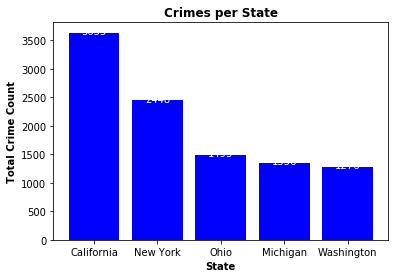

In [163]:
#create new dataframe with columns needed for graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select years 2014-2017
only_year_2014_2017_4 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_4 = df.loc[only_year_2014_2017_4]

#groupby state
groupby_year_state = crime_df_4.groupby(["State"])

#get the total sum of offender count after grouping by the state
crime_year_state = groupby_year_state["Total Offender Count"].sum()

#create series into dataframe
crime_year_state = pd.DataFrame(crime_year_state)

#sort the total offender count in descending order to get the states with highest count
crime_year_state = crime_year_state.sort_values(["Total Offender Count"],ascending=[False]) 

#reset the index
crime_year_state = crime_year_state.reset_index()

#select the top 5 states with highest total offender count 
crime_year_state = crime_year_state.head()

#create bar graph

#set the x axis
state = (crime_year_state["State"])

#set the y axis
crime = (crime_year_state["Total Offender Count"])

#plot the line graph for California 
bar_chart = plt.bar(state, crime, color="b", align="center")

label_function(bar_chart)

#set labels
plt.title("Crimes per State", fontweight = "bold")
plt.xlabel("State", fontweight = "bold")
plt.ylabel("Total Crime Count", fontweight = "bold")

# California Hate Crime Trend From 2014-2017

Text(0, 0.5, 'Crime Count')

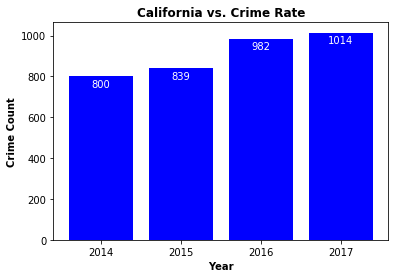

In [164]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_1 = df.loc[only_year_2014_2017]

#select only California from the dataframe 
only_california = crime_df_1.loc[crime_df_1["State"] == "California", :]

#only_california.head()

#groupby the year
groupby_year_1 = only_california.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014 = groupby_year_1["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014 = pd.DataFrame(crime_count_2014)

#reset the index
crime_count_2014 = crime_count_2014.reset_index()

#crime_count_2014
############################################### Graph ###########################################3
#set the x axis
years = (crime_count_2014["Year"])

#set the y axis
crime = (crime_count_2014["Total Offender Count"])

#plot the line graph for California 

bar_chart = plt.bar(years, crime, color="b", align="center")


def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 60
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')
        
label_function(bar_chart)

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("California vs. Crime Rate", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Crime Count", fontweight = "bold")




# Unemployment Rate in California

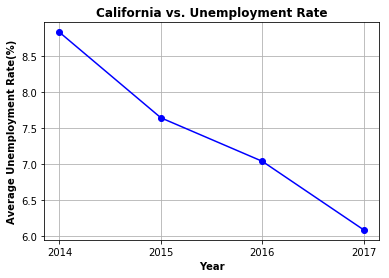

In [170]:
cleaned_unemployment_rate_df.head()

#create new dataframe with columns needed for line graph
ca_unemployment_rate = pd.DataFrame(cleaned_unemployment_rate_df, columns = ["Year", "State", "Unemployment Rate"])

#select only years 2014-2017
ca_2014_2017 = (ca_unemployment_rate["Year"] >= 2014) & (ca_unemployment_rate["Year"] <= 2017)

ca_2014_2017_1 = ca_unemployment_rate.loc[ca_2014_2017]

#groupby the year
ca_groupby_2014_2017 = ca_2014_2017_1.groupby(["Year"])

#take the average unemployment rate of each year 
ca_groupby_2014_2017 = ca_groupby_2014_2017["Unemployment Rate"].mean()

#create dataframe
ca_groupby_2014_2017 = pd.DataFrame(ca_groupby_2014_2017)

#reset the index
ca_groupby_2014_2017 = ca_groupby_2014_2017.reset_index()

#create the line graph

#set X and Y axis
x_axis = ca_groupby_2014_2017["Year"]
y_axis = ca_groupby_2014_2017 ["Unemployment Rate"]

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#plot the line graph
ca_unemployment, = plt.plot(x_axis, y_axis, marker='o', color='blue', label='California')

#label the graph
plt.title("California vs. Unemployment Rate", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Average Unemployment Rate(%)", fontweight = "bold")
plt.grid()




# New York Crime Trend From 2014-2017

Text(0, 0.5, 'Crime Count')

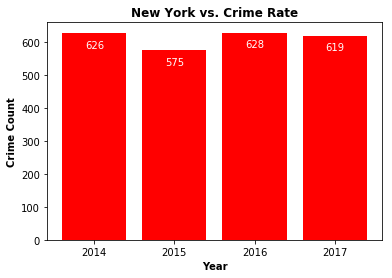

In [171]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_2 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_2 = df.loc[only_year_2014_2017]

#select only New York from the dataframe 
only_newyork = crime_df_2.loc[crime_df_1["State"] == "New York", :]

#only_newyork.head()

#groupby the year
groupby_year_2 = only_newyork.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_2 = groupby_year_2["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_2 = pd.DataFrame(crime_count_2014_2)

#reset the index
crime_count_2014_2 = crime_count_2014_2.reset_index()

#crime_count_2014_2

############################################### Graph #####################################################

#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the bar graph for New York 

bar_chart = plt.bar(years, crime, color="r", align="center")

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 50
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)


#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("New York vs. Crime Rate", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Crime Count", fontweight = "bold")

# Ohio Trend From 2014-2017

Text(0, 0.5, 'Crime Count')

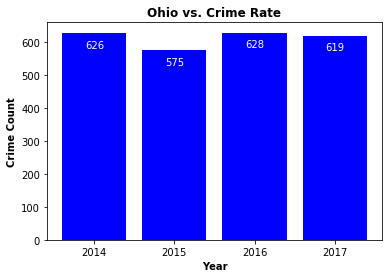

In [154]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_3 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_3 = df.loc[only_year_2014_2017]

#select only Ohio from the dataframe 
only_ohio = crime_df_1.loc[crime_df_1["State"] == "Ohio", :]

#only_ohio.head()

#groupby the year
groupby_year_3 = only_ohio.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_3 = groupby_year_3["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_3 = pd.DataFrame(crime_count_2014_3)

#reset the index
crime_count_2014_3 = crime_count_2014_3.reset_index()

#crime_count_2014_3 

########################################## Graph ####################################################

#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the line graph for Ohio 

bar_chart = plt.bar(years, crime, color="b", align="center")

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 50
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)

#set labels
plt.title("Ohio vs. Crime Rate", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Crime Count", fontweight = "bold")

# Crime Rate in Major Cities (LA, NYC, Columbus)

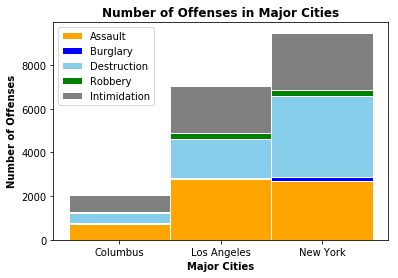

In [10]:
#create new dataframe with information needed from existing dataframe
major_cities = pd.DataFrame(crime_df, columns = ['Agency Name', 'Offense Categories'])

#set index to the city name in order to filter out multiple cities at once
major_cities.set_index("Agency Name", inplace=True)

#filter out cities to only extract the ones needed
major_cities = major_cities.loc[["Los Angeles", "New York", "Columbus"]] 

#reset the index
major_cities = major_cities.reset_index()


#ASSAULT:
#only filter out assault crimes and groupby filtered cities
assault =  major_cities.loc[major_cities["Offense Categories"] == "Assault"]

assault_1 = assault.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
assault_total = assault_1.count()

#rename column to easily extract information for stacked bar chart
assault_total = assault_total.rename(columns={'Offense Categories': "Assault"})

#reset index 
assault_total = assault_total.reset_index()

#BURGLARY:
#only filter out burglary crimes and groupby filtered cities
burglary =  major_cities.loc[major_cities["Offense Categories"] == "Burglary/Breaking & Entering"]

burglary_1 = burglary.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
burglary_total = burglary_1.count()

#rename column to easily extract information for stacked bar chart
burglary_total = burglary_total.rename(columns={'Offense Categories': "Burglary"})

#reset index 
burglary_total = burglary_total.reset_index()

#DESTRUCTION: 
#only filter out destruction crimes and groupby filtered cities
destruction =  major_cities.loc[major_cities["Offense Categories"] == "Destruction/Damage/Vandalism of Property"]

destruction_1 = destruction.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
destruction_total = destruction_1.count()

#rename column to easily extract information for stacked bar chart
destruction_total = destruction_total.rename(columns={'Offense Categories': "Destruction"})

#reset index 
destruction_total = destruction_total.reset_index()

#ROBBERY:
#only filter out robbery crimes and groupby filtered cities
robbery =  major_cities.loc[major_cities["Offense Categories"] == "Robbery"]

robbery_1 = robbery.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
robbery_total = robbery_1.count()

#rename column to easily extract information for stacked bar chart
robbery_total = robbery_total.rename(columns={'Offense Categories': "Robbery"})

#reset index 
robbery_total = robbery_total.reset_index()

#INTIMIDATION:
#only filter out intimidation crimes and groupby filtered cities
intimidation =  major_cities.loc[major_cities["Offense Categories"] == "Intimidation"]

intimidation_1 = intimidation.groupby(["Agency Name"])

#count number of assault offenses in filtered cities
intimidation_total = intimidation_1.count()

#rename column to easily extract information for stacked bar chart
intimidation_total = intimidation_total.rename(columns={'Offense Categories': "Intimidation"})

#reset index
intimidation_total = intimidation_total.reset_index()

#CREATE STACKED BAR CHART

#extract specific information for each bar
bar1 = assault_total["Assault"]
bar2 = burglary_total["Burglary"]
bar3= destruction_total["Destruction"]
bar4 = robbery_total["Robbery"]
bar5 = intimidation_total["Intimidation"]

 
#the position of the bars on the x-axis
r = [0,1,2]
 
#names of group and bar width
names = ['Columbus', 'Los Angeles', 'New York']
barWidth = 1
 
#create bar 1
plt.bar(r, bar1, color ='orange', edgecolor='white', width=barWidth, label="Assault")
#create bar 2
plt.bar(r, bar2, bottom=bar1, color='blue', edgecolor='white', width=barWidth, label="Burglary")
#create bar 3
plt.bar(r, bar3, color='skyblue', bottom=bar1+bar2, edgecolor='white', width=barWidth, label="Destruction")
#create bar 4
plt.bar(r, bar4, color='green', bottom=bar1+bar2+bar3, edgecolor='white', width=barWidth, label="Robbery")
#create bar 5
plt.bar(r, bar5, color='gray', bottom=bar1+bar2+bar3+bar4, edgecolor='white', width=barWidth, label="Intimidation")
 
#name the ticks on x-axis
plt.xticks(r, names)

#label the graph
plt.xlabel("Major Cities", fontweight='bold')
plt.ylabel("Number of Offenses", fontweight='bold')
plt.title ("Number of Offenses in Major Cities", fontweight='bold')

#plot the legend in best location
plt.legend(loc="best")

#show graph
plt.show()

# Where do most crimes occur in CA and OH?

ValueError: shape mismatch: objects cannot be broadcast to a single shape

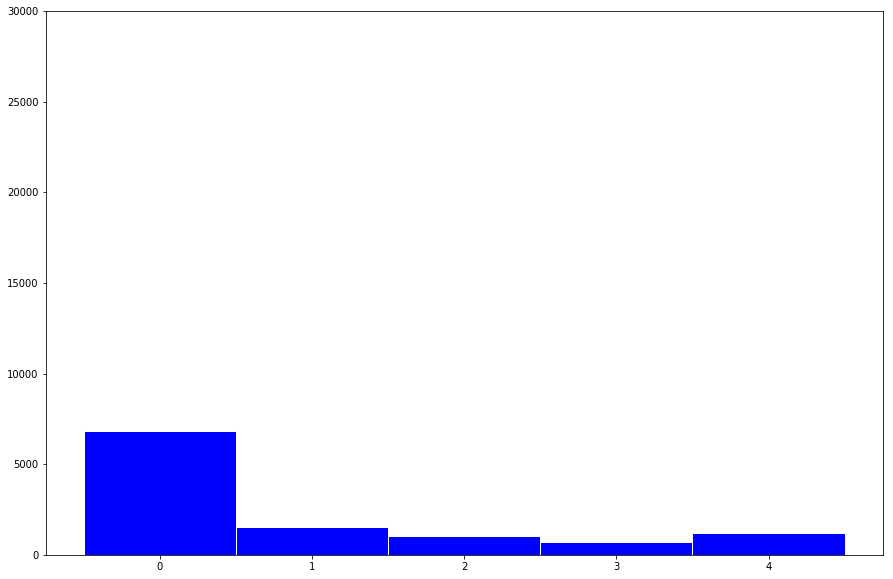

In [62]:
#create new dataframe with information needed from existing dataframe
crime_locations = pd.DataFrame(crime_df, columns = ['State', 'Location Categories'])

#set index to the city name in order to filter out multiple cities at once
crime_locations.set_index("State", inplace=True)

#filter out states to only extract the ones needed
crime_locations = crime_locations.loc[["California","New York", "Ohio", "Michigan","Washington"]] 

#COMMERCIAL/OFFICE BUILDING: 
#only filter out crimes that occured in commercial/office buildings and groupby filtered states
commercial_office = crime_locations.loc[crime_locations["Location Categories"] == "Commercial/Office Building"]

commercial_office_total = commercial_office.groupby(["State"])

#count number of crimes in commercial/office buildings in filtered states
commercial_office_total = commercial_office_total.count()

#rename column to easily extract information for stacked bar chart
commercial_office_total = commercial_office_total.rename(columns={'Location Categories': "Commercial/Office"})

#reset index 
commercial_office_total = commercial_office_total.reset_index()

#HIGHWAY/ROAD/ALLEY/STREET/SIDEWALK: 
#only filter out crimes that occured outdoors and groupby filtered states
outdoors = crime_locations.loc[crime_locations["Location Categories"] == "Highway/Road/Alley/Street/Sidewalk"]

outdoors_total = outdoors.groupby(["State"])

#count number of crimes that occured outdoors within filtered states
outdoors_total = outdoors_total.count()

#rename column to easily extract information for stacked bar chart
outdoors_total = outdoors_total.rename(columns={'Location Categories': "Outdoors"})

#reset index 
outdoors_total = outdoors_total.reset_index()

#OTHER/UNKNOWN: 
#only filter out crimes that occured in unknown locations and groupby filtered states
unknown = crime_locations.loc[crime_locations["Location Categories"] == "Other/Unknown"]

unknown_total = unknown.groupby(["State"])

#count number of crimes that occured in unknown locations within filtered states
unknown_total = unknown_total.count()

#rename column to easily extract information for stacked bar chart
unknown_total = unknown_total.rename(columns={'Location Categories': "Unknown"})

#reset index 
unknown_total = unknown_total.reset_index()

#RESIDENCE/HOME: 
#only filter out crimes that occured in residences/homes and groupby filtered states
residence = crime_locations.loc[crime_locations["Location Categories"] == "Residence/Home"]

residence_total = residence.groupby(["State"])

#count number of crimes that occured in residences/homes within filtered states
residence_total = residence_total.count()

#rename column to easily extract information for stacked bar chart
residence_total = residence_total.rename(columns={'Location Categories': "Residences"})

#reset index 
residence_total = residence_total.reset_index()

#SCHOOL/COLLEGE: 
#only filter out crimes that occured in schools/colleges and groupby filtered states
school = crime_locations.loc[crime_locations["Location Categories"] == "School/College"]

school_total = school.groupby(["State"])

#count number of crimes that occured in schools/colleges within filtered states
school_total = school_total.count()

#rename column to easily extract information for stacked bar chart
school_total = school_total.rename(columns={'Location Categories': "Schools"})

#reset index 
school_total = school_total.reset_index()

#CREATE STACKED BAR CHART

#define plot area
plt.figure(figsize=(15,10))
plt.ylim(0, 30000)



#extract specific information for each bar
bar1 = commercial_office_total["Commercial/Office"]
bar2 = outdoors_total["Outdoors"]
bar3= unknown_total["Unknown"]
bar4 = residence_total ["Residences"]
bar5 = school_total["Schools"]


#the position of the bars on the x-axis
r = [0,1, 2, 3, 4]
 
#names of group and bar width
names = ['California', 'New York','Michigan','Ohio', 'Washington']
barWidth = 1
 
#create bar 1
plt.bar(r, bar1, color ='blue', edgecolor='white', width=barWidth, label="Other/Unknown")
#create bar 2
plt.bar(r, bar2, bottom=bar1, color='black', edgecolor='white', width=barWidth, label="Highway/Road/Alley/Street/Sidewalk")
#create bar 3
plt.bar(r, bar3, color='pink', bottom=bar1+bar2, edgecolor='white', width=barWidth, label="Commercial/Office")
#create bar 4
plt.bar(r, bar4, color='yellow', bottom=bar1+bar2+bar3, edgecolor='white', width=barWidth, label="Residence/HOme")
#create bar 5
plt.bar(r, bar5, color='gray', bottom=bar1+bar2+bar3+bar4, edgecolor='white', width=barWidth, label="School/College")
 
#name the ticks on x-axis
plt.xticks(r, names)

#label the graph
plt.xlabel("California and Ohio", fontweight='bold')
plt.ylabel("Number of Offenses", fontweight='bold')
plt.title ("Number of Offenses in CA and OH", fontweight='bold')

#plot the legend in best location
plt.legend(loc="best")

#show graph
plt.show()



# Where do most crimes occur in NY?

In [12]:
#create new dataframe with information needed from existing dataframe
crime_locations = pd.DataFrame(crime_df, columns = ['State', 'Location Categories'])

#set index to the city name in order to filter out multiple cities at once
crime_locations.set_index("State", inplace=True)

#filter out states to only extract the ones needed
crime_locations = crime_locations.loc[["New York"]] 

#COMMERCIAL/OFFICE BUILDING: 
#only filter out crimes that occured in commercial/office buildings
commercial_office = crime_locations.loc[crime_locations["Location Categories"] == "Commercial/Office Building"]

#count the number of crimes in commercial/office buildings in NY
commercial_office = commercial_office.count()

#rename column to easily extract information for stacked bar chart
commercial_office = commercial_office.rename(columns={'Location Categories': "Commercial/Office"})


#reset index 
#commercial_office_total = commercial_office_total.reset_index()

#HIGHWAY/ROAD/ALLEY/STREET/SIDEWALK: 
#only filter out crimes that occured outdoors 
outdoors = crime_locations.loc[crime_locations["Location Categories"] == "Highway/Road/Alley/Street/Sidewalk"]

#count number of crimes that occured outdoors in NY
outdoors = outdoors.count()

#rename column to easily extract information for stacked bar chart
outdoors_total = outdoors_total.rename(columns={'Location Categories': "Outdoors"})

#reset index 
#outdoors_total = outdoors_total.reset_index()

#OTHER/UNKNOWN: 
#only filter out crimes that occured in unknown locations
unknown = crime_locations.loc[crime_locations["Location Categories"] == "Other/Unknown"]

#count number of crimes that occured in unknown locations in NY
unknown = unknown.count()

#rename column to easily extract information for stacked bar chart
unknown_total = unknown_total.rename(columns={'Location Categories': "Unknown"})

#reset index 
#unknown_total = unknown_total.reset_index()

#RESIDENCE/HOME: 
#only filter out crimes that occured in residences/homes 
residence = crime_locations.loc[crime_locations["Location Categories"] == "Residence/Home"]

#count number of crimes that occured in residences/homes within filtered states
residence = residence.count()

#rename column to easily extract information for stacked bar chart
residence_total = residence_total.rename(columns={'Location Categories': "Residences"})

#reset index 
#residence_total = residence_total.reset_index()

#SCHOOL/COLLEGE: 
#only filter out crimes that occured in schools/colleges 
school = crime_locations.loc[crime_locations["Location Categories"] == "School/College"]

#count number of crimes that occured in schools/colleges in NY
school = school.count()

#rename column to easily extract information for stacked bar chart
school_total = school_total.rename(columns={'Location Categories': "Schools"})

#reset index 
#school_total = school_total.reset_index()

#CREATE STACKED BAR CHART

#extract specific information for each bar
bar1 = commercial_office["Commercial/Office"]
bar2 = outdoors_total["Outdoors"]
bar3= unknown_total["Unknown"]
bar4 = residence_total ["Residences"]
bar5 = school_total["Schools"]


#the position of the bars on the x-axis
r = [0]
 
#names of group and bar width
names = ['New York']
barWidth = 1
 
#create bar 1
plt.bar(r, bar1, color ='blue', edgecolor='white', width=barWidth, label="Commercial/Office")
#create bar 2
plt.bar(r, bar2, bottom=bar1, color='black', edgecolor='white', width=barWidth, label="Highway/Road/Alley/Street/Sidewalk")
#create bar 3
plt.bar(r, bar3, color='pink', bottom=bar1+bar2, edgecolor='white', width=barWidth, label="Other/Unknown")
#create bar 4
plt.bar(r, bar4, color='yellow', bottom=bar1+bar2+bar3, edgecolor='white', width=barWidth, label="Residence/HOme")
#create bar 5
plt.bar(r, bar5, color='gray', bottom=bar1+bar2+bar3+bar4, edgecolor='white', width=barWidth, label="School/College")
 
#name the ticks on x-axis
plt.xticks(r, names)

#label the graph
plt.xlabel("Top 3 States", fontweight='bold')
plt.ylabel("Number of Offenses", fontweight='bold')
plt.title ("Number of Offenses in Locations within Top\n 3 States With Highest Crime", fontweight='bold')

#plot the legend in best location
plt.legend(loc="best")

#show graph
plt.show()

KeyError: 'Commercial/Office'

# California Monthly Crime Rate Between 2014 - 2017

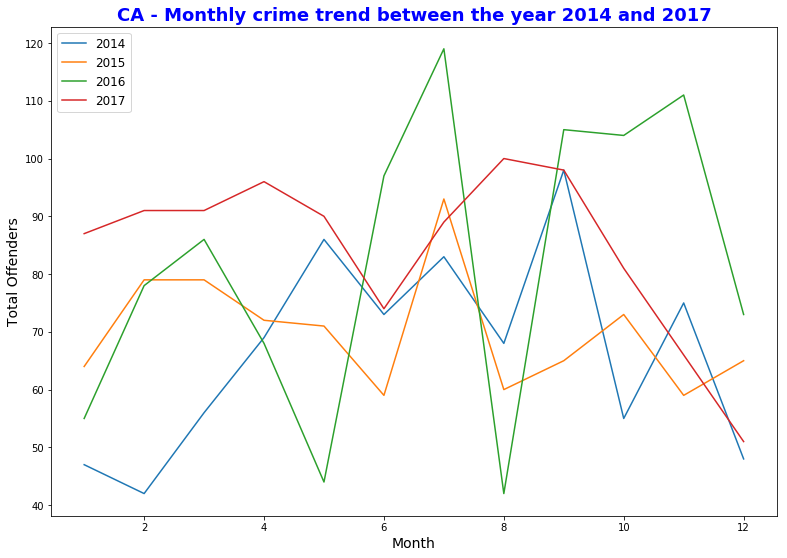

In [25]:
cbym_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.','Incident Date','Total Offender Count','Offender Race'])

#Filter the data for CA and the year between 2014 to 2017
cbym_df = cbym_df[(cbym_df.Year >= 2014) & (cbym_df['State Abbr.'] == 'CA')]

#Convert the Incident data as 'datetime' type and then separate the incident month and year from Incident date
cbym_df['Incident Date'] =  pd.to_datetime(cbym_df['Incident Date'])
cbym_df['Inc year'] = pd.to_numeric(cbym_df['Incident Date'].dt.year)
cbym_df['Inc month'] = pd.to_numeric(cbym_df['Incident Date'].dt.month)

#Crime_by_year_df.head()

#Get the total offender count using Groupby on 'Inc year' and 'Inc month'
Crime_count_mth_yr_df = cbym_df.groupby(["Inc year","Inc month"])
ccount =  Crime_count_mth_yr_df['Total Offender Count'].sum()

#Create the dataframe
ccnt_mth_yr_summary_df = pd.DataFrame({
                             'Total Offender count' : ccount,
                             })

#Convert the index as the coloumns in the dataframe
ccnt_mth_yr_summary_df = ccnt_mth_yr_summary_df.reset_index(level=["Inc year","Inc month"])

ccnt_mth_yr_summary_df.head()

#Define x-axis
start_mth = ccnt_mth_yr_summary_df['Inc month'].min()
end_mth = ccnt_mth_yr_summary_df['Inc month'].max()

x_axis = np.arange(start_mth, end_mth+1, 1)

#Define plot area
plt.figure(figsize=(13,9))

#Plot the line graph for the period from 2014 to 2017

indx=0
for yr in ccnt_mth_yr_summary_df['Inc year']:

   if (indx != yr):
       indx = yr
       ccnt_data_bymth = ccnt_mth_yr_summary_df[ccnt_mth_yr_summary_df['Inc year'] == yr]
       y_axis = pd.Series(ccnt_data_bymth['Total Offender count'])
       plt.plot(x_axis, y_axis, label= yr)

plt.xlabel("Month",fontsize=14)
plt.ylabel("Total Offenders",fontsize=14)
plt.title("CA - Monthly crime trend between the year 2014 and 2017",fontsize=18, fontweight='bold', color="blue")
plt.legend(loc="upper left",fontsize=12)
plt.show()

# Monthly Crime Rate From 2014-2017 in Top 3 States with Highest Crime

Text(0, 0.5, 'Offender Count')

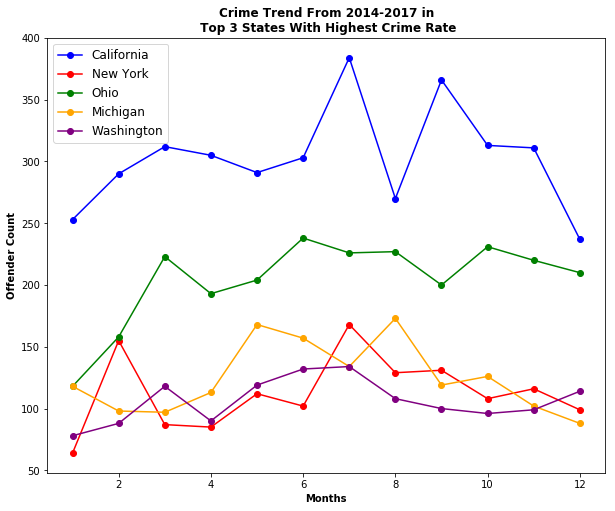

In [44]:
#create new dataframe taking columns needed from crime_df dataframe
months = pd.DataFrame(crime_df, columns = ['State', 'Total Offender Count', 'Incident Date', 'Year'])

#only select years between 2014-2017 for analysis 
years = (months["Year"] >= 2014) & (months["Year"] <= 2017)
months = months.loc[years]

#set the index as the state and total offender count
months.set_index("State", "Total Offender Count", inplace=True)

#only select the 3 months with the highest crime rate for analysis
months = months.loc[["California", "New York", "Ohio", "Michigan", "Washington"]]

#convert the incident date to datetime to be able to extract month
months['Incident Date'] = pd.to_datetime(months['Incident Date'])

#extract each month from the incident date
months['Date'] = months['Incident Date'].dt.month

#groupby the state and date and sum up the total offenders count
states_months_group = months.groupby(["State"] + ["Date"])
states_months_group = states_months_group.sum()

#reset the index
states_months_group = states_months_group.reset_index()

#create line graph for the 3 months with highest crime rate

#define plot area
plt.figure(figsize=(10,8))

#set x-axis
x_axis = np.arange(1,13)
#set y-axis for California
y_axis_ca = states_months_group.iloc[0:12:,2:3]
#set y-axis for New York
y_axis_ny = states_months_group.iloc[12:24:,2:3]
#set y-axis for Ohio
y_axis_oh = states_months_group.iloc[24:36:,2:3]
#set y-axis for Michigan
y_axis_mi = states_months_group.iloc[36:48:,2:3]
#set y-axis for Washington
y_axis_wa = states_months_group.iloc[48:60:,2:3]

#plot California line
ca_line, = plt.plot(x_axis, y_axis_ca, marker='o', color='blue', label='California')
#plot New York line
ny_line, = plt.plot(x_axis, y_axis_ny, marker='o', color='red', label="New York")
#plot Ohio line
oh_line, = plt.plot(x_axis, y_axis_oh, marker='o', color='green', label="Ohio")
#plot Michigan line
mi_line, = plt.plot(x_axis, y_axis_mi, marker='o', color='orange', label="Michigan")
#plot Washington line
wa_line, = plt.plot(x_axis, y_axis_wa, marker='o', color='purple', label="Washington")

#position the legend at the best location
plt.legend(loc="upper left", fontsize=12)



#label the chart
plt.title("Crime Trend From 2014-2017 in\n Top 3 States With Highest Crime Rate", fontweight="bold")
plt.xlabel("Months", fontweight="bold")
plt.ylabel("Offender Count", fontweight="bold")
